<a href="https://colab.research.google.com/github/usher233/yolov5_fire_detection/blob/main/yolov5_fire_detection_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Copyright 2022 YuhangWu. All rights reserved.
# You may not utilize this notebook without citation

# 转移到yolo文件夹
switch to folder yolo

In [4]:
#%cd /content/drive/MyDrive/AI_learning/yolo
#%ls

/content/drive/MyDrive/AI_learning/yolo
 dataset_mask/             fire_detection.tar   yolov5/
'fire_detection (1).tar'   Untitled0.ipynb      yolov5.ipynb


# 解压准备好的火焰数据集
Unpack the prepared dataset

In [ ]:
#!tar -zxvf fire_detection.tar

# 测试预训练yolov5s模型
Test the pretrained yolov5s model

In [13]:
#!python yolov5/detect.py --source 'Fire_and_smoke_dataset/JPEGImages/00000.jpg' --weights yolov5/yolov5s.pt

detect: weights=['yolov5s.pt'], source=Fire_and_smoke_dataset/JPEGImages/00000.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-159-gc16671f torch 1.11.0+cu113 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/drive/MyDrive/AI_learning/yolo/Fire_and_smoke_dataset/JPEGImages/00000.jpg: 480x640 Done. (0.365s)
Speed: 1.9ms pre-process, 365.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp14


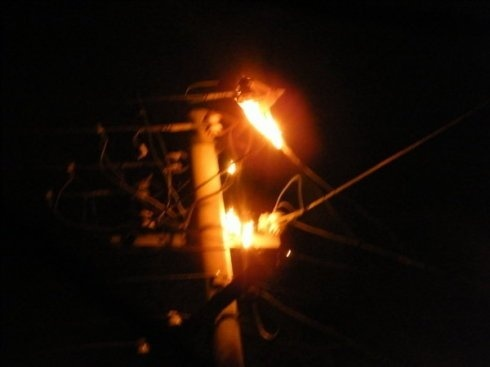

In [22]:
#from IPython import display
#display.Image(filename='yolov5/runs/detect/exp14/00000.jpg', width=600)

可以看到并没有对火焰进行标注

It can be seen that the flame is not annotated

# 将VOC类型的数据集改写成YOLO
voc2yolo

In [12]:
%cd /content/drive/MyDrive/AI_learning/yolo

/content/drive/MyDrive/AI_learning/yolo


In [13]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fNNHtGr2P2uhSjhp0v6q")
project = rf.workspace("yolov5sfire").project("voc2020")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to VOC2020-1 in yolov5pytorch:: 100%|██████████| 6732/6732 [00:47<00:00, 141.02it/s]


# 训练一个基于yolov5s的火焰烟雾检测网络
Training a yolov5s-based flame and smoke detection network

In [8]:
%cd /content/drive/MyDrive/AI_learning/yolo/yolov5

/content/drive/MyDrive/AI_learning/yolo/yolov5


In [15]:
!python /content/drive/MyDrive/AI_learning/yolo/yolov5/train.py --batch-size 64 --weights yolov5s.pt --data /content/drive/MyDrive/AI_learning/yolo/VOC2020-1/data.yaml --epochs 40 --cfg /content/drive/MyDrive/AI_learning/yolo/yolov5/models/yolov5s.yaml
#注意改写yaml文件的nc（num_classes）

train: weights=yolov5s.pt, cfg=/content/drive/MyDrive/AI_learning/yolo/yolov5/models/yolov5s.yaml, data=/content/drive/MyDrive/AI_learning/yolo/VOC2020-1/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=40, batch_size=64, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.
From https://github.com/ultralytics/yolov5
   2b64b45..05d4fc9  ma

# 火焰模型检测
detect by firenet

In [ ]:
!python /content/drive/MyDrive/AI_learning/yolo/yolov5/detect.py --weights /content/drive/MyDrive/AI_learning/yolo/yolov5/runs/train/exp3/weights/best.pt --source /fire.gif


In [ ]:
!python /content/drive/MyDrive/AI_learning/yolo/yolov5/detect.py --weights /content/drive/MyDrive/AI_learning/yolo/yolov5/runs/train/exp3/weights/best.pt --source /firevideo.mp4